In [1]:
using Pkg 

Pkg.activate("..")

using MiCRM_stability
using LinearAlgebra
using StatsBase
using Distributions
using JLD2
using Random
using Graphs

using CairoMakie

  Activating project at `~/Projects/MiCRM_stability`


In [2]:
#get parameter names
fe = fieldnames(MiCRM_stability.exponential_params)
fs = fieldnames(MiCRM_stability.structural_params)
fs = filter(x -> x ∉ [:χ,:ϕ,:γ, :η], fs)
    
names =  vcat(fe...,fs..., "Cu", "Cd", "s")

# #latex names
fe_L = [L"g^{(x)}",L"g^{(s)}",L"m^{(x)}",L"f^{(y)}",L"\lambda^{(y)}",L"i^{ (y)}",L"o^{(y)}"]
fs_L = [L"\alpha",L"\beta",L"\Lambda^*",L"\rho",L"\tild Morena Baccarin - Deadpool e{\rho}",L"\sigma",L"\tilde{\sigma}",L"C_U", L"C_D"]

# #concatanate
names = string.(names)
names_L = vcat(fe_L,fs_L)

# #filter parameters
p_ind = collect(1:16)
rm_ind = findall(names .∈ Ref(["γ","η","χ","ϕ","σ̃","ρ̃"]))
p_ind = filter(x -> x .∉ Ref(rm_ind), p_ind)

# # #filter name vectors
names = names[p_ind]
names_L = names_L[p_ind]

# # #load
res = load("../Results/data/new_sims/dynamic_stabiltiy.jld2")

Dict{String, Any} with 3 entries:
  "v" => 0
  "l" => Complex[0.236925+0.0im, 0.516385+0.0im, 0.654554+0.0im, 0.682491+0.0im…
  "p" => Any[[1.97155, 0.801536, 1.7367, 1.46876, 0.0995605, 0.107985, 0.674219…

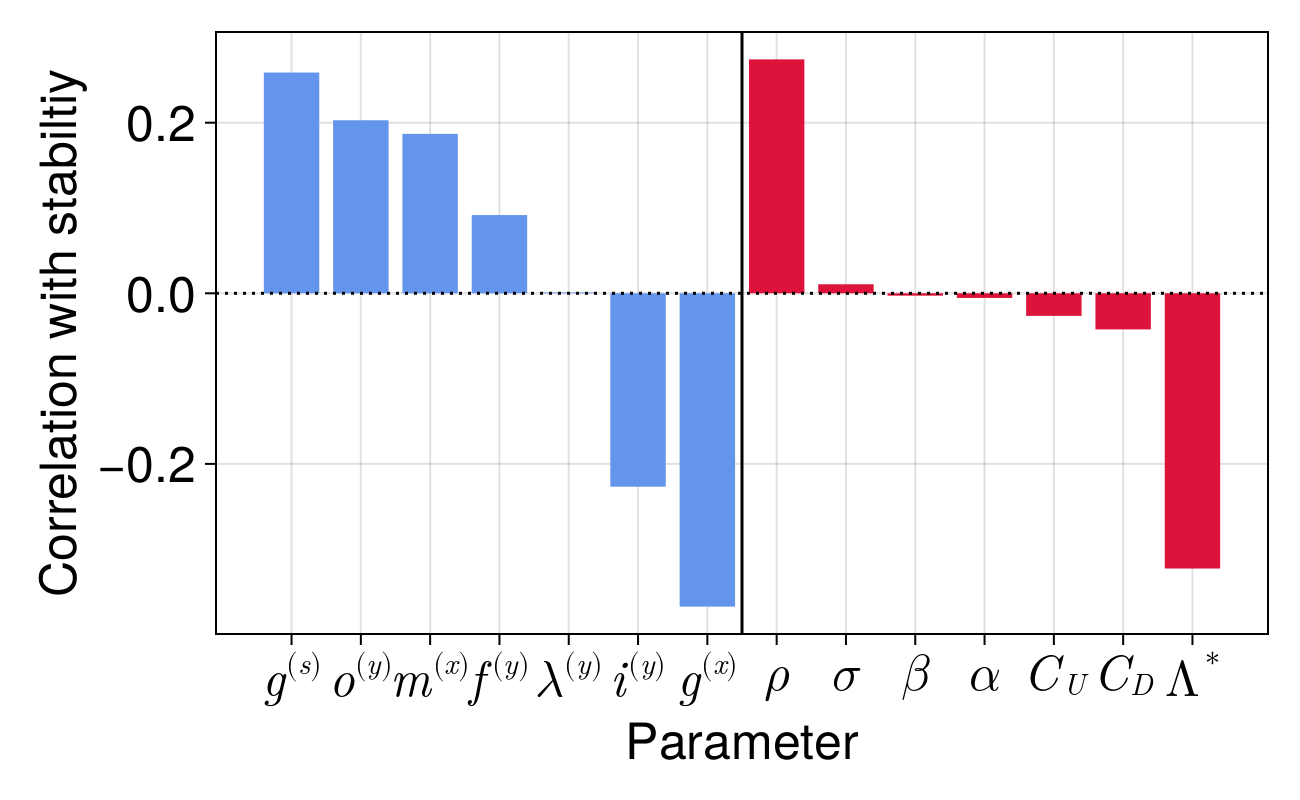

In [3]:
#get stability and correlate
p_mat = hcat(res["p"]...)[p_ind,:]
stab = [x.re < 0 for x = res["l"]]
stability_cor = [cor(abs.(p), stab) for p = eachrow(p_mat)]

# #get color
c = vcat(fill(:cornflowerblue, length(fe_L)), fill(:crimson, length(fs_L)))
c = c[p_ind]

# # #sort
# ind = sortperm((stability_cor),rev=true)
ind = vcat(sortperm((stability_cor[1:7]),rev=true),7 .+ sortperm((stability_cor[8:end]),rev=true))

f = Figure(size = (650,400))
ax = Axis(f[1,1], xticks = (1:length(names), names_L[ind]),
    xlabel = "Parameter", ylabel = "Correlation with stabiltiy",
    xticklabelsize = 25, yticklabelsize = 25,
    xlabelsize = 25, ylabelsize = 25)

barplot!(ax, stability_cor[ind], color = c[ind])
hlines!(ax, [0], linestyle = :dot, color = "black")
vlines!(ax, [7.5], color = :black)

f

In [4]:
save("../Results/Figures/stability_correlations.svg", f)
save("../Results/Figures/stability_correlations.pdf", f)

CairoMakie.Screen{PDF}


# size

In [5]:
res = load("../Results/data/new_sims/size_stability.jld2")

stab = [x.re < -1e-6 for x = res["l"]];

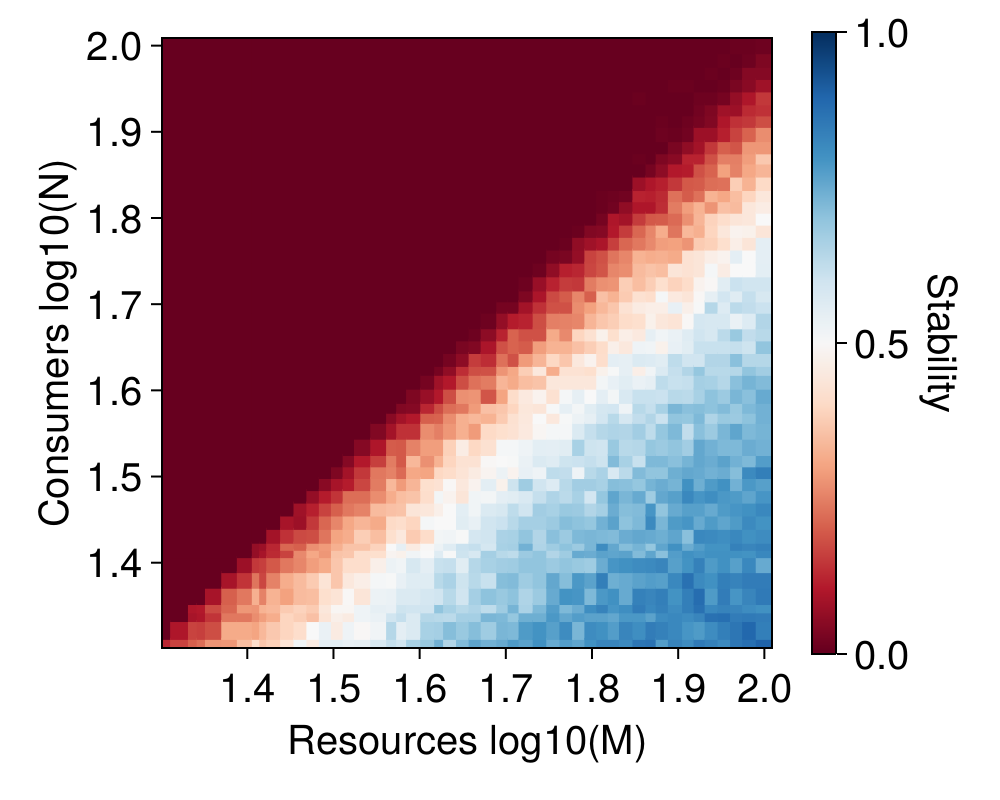

In [6]:
#params
#params
N=50
M=50
Np = 100


n_vec = Int.(floor.(10 .^ range(log10(20), log10(100), length = N)))
m_vec = Int.(floor.(10 .^range(log10(20), log10(100), length = M)))
N_mat = [n_vec[i] for i = 1:N, j = 1:M]
M_mat = [m_vec[j] for i = 1:N, j = 1:M]


f = Figure(size = (500,400))

#plot stabiltiy heatmap
ax = Axis(f[1,1], ylabel = "Consumers log10(N)", xlabel = "Resources log10(M)", aspect = 1, xticklabelsize = 20, yticklabelsize = 20, xlabelsize = 20, ylabelsize = 20)
stab = mean(stab,dims=3)[:,:,1]
cm = :RdBu
heatmap!(ax, log10.(n_vec), log10.(m_vec), stab', colormap = (cm), colorrange = (0,1))
Colorbar(f[1,2], colormap = (cm), label = "Stability", flip_vertical_label = true, labelsize = 20, ticklabelsize = 20, colorrange = (0,1), tellwidth = false)

colsize!(f.layout, 2, Relative(0.05))
# colgap!(f.layout,0)

f

In [7]:
res["l"][end,1,1]

0.0012019396684304655 + 0.0im

In [8]:
save("../Results/Figures/size_correlations.pdf", f)
save("../Results/Figures/size_correlations.svg", f)

CairoMakie.Screen{SVG}


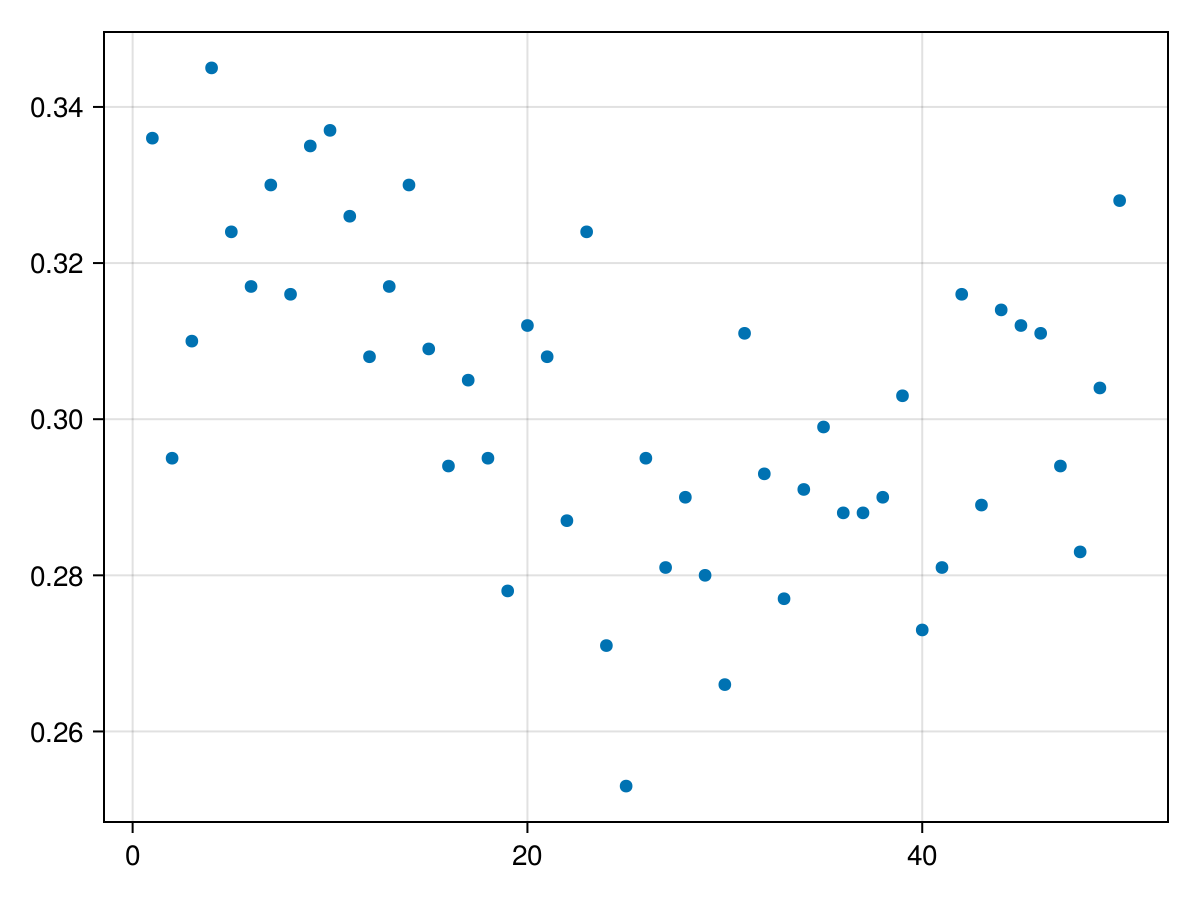

In [10]:
res = load("../Results/data/new_sims/nested_stabiltiy.jld2")

stab = [x.re < 0 for x = res["l"]]

mean(stab,dims=2)[:] |> plot

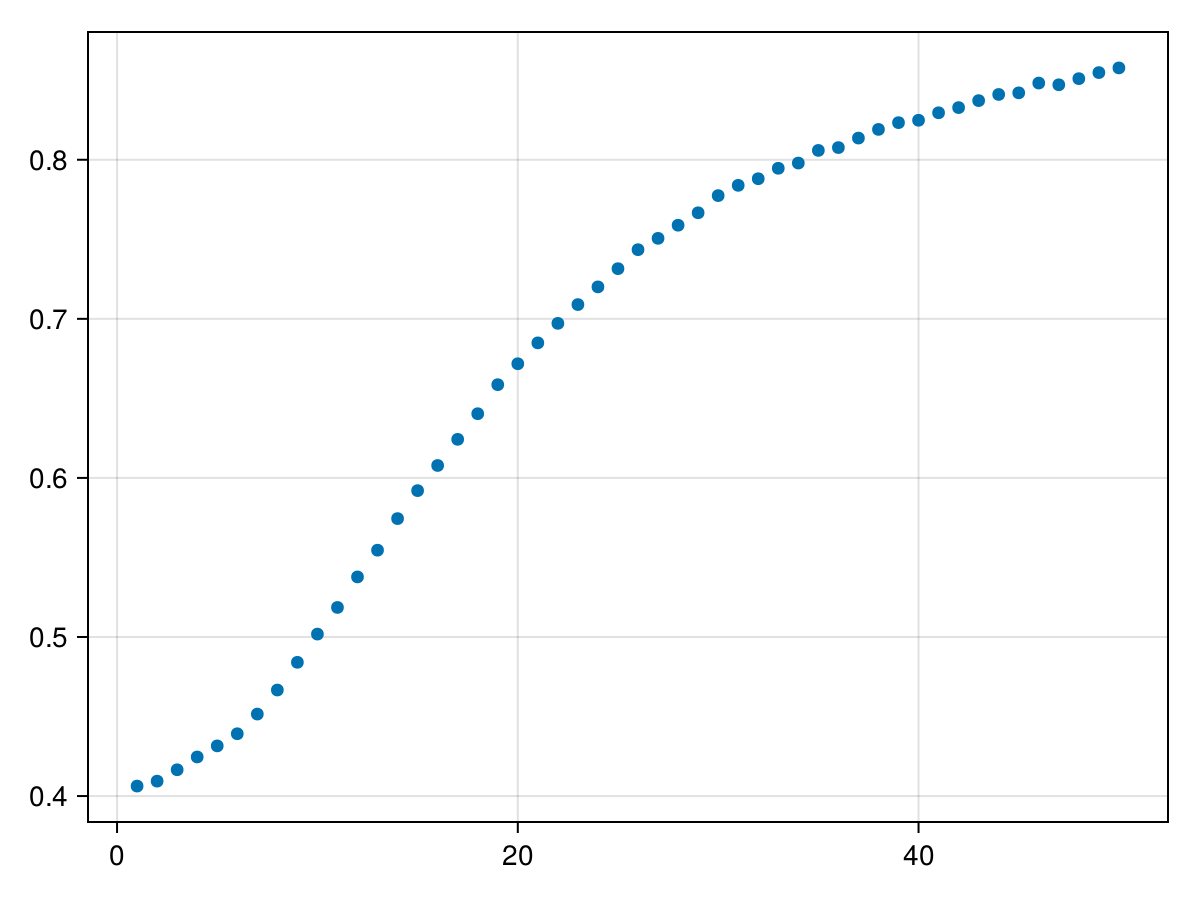

In [11]:
mean(res["p"], dims =2)[:,1] |> plot

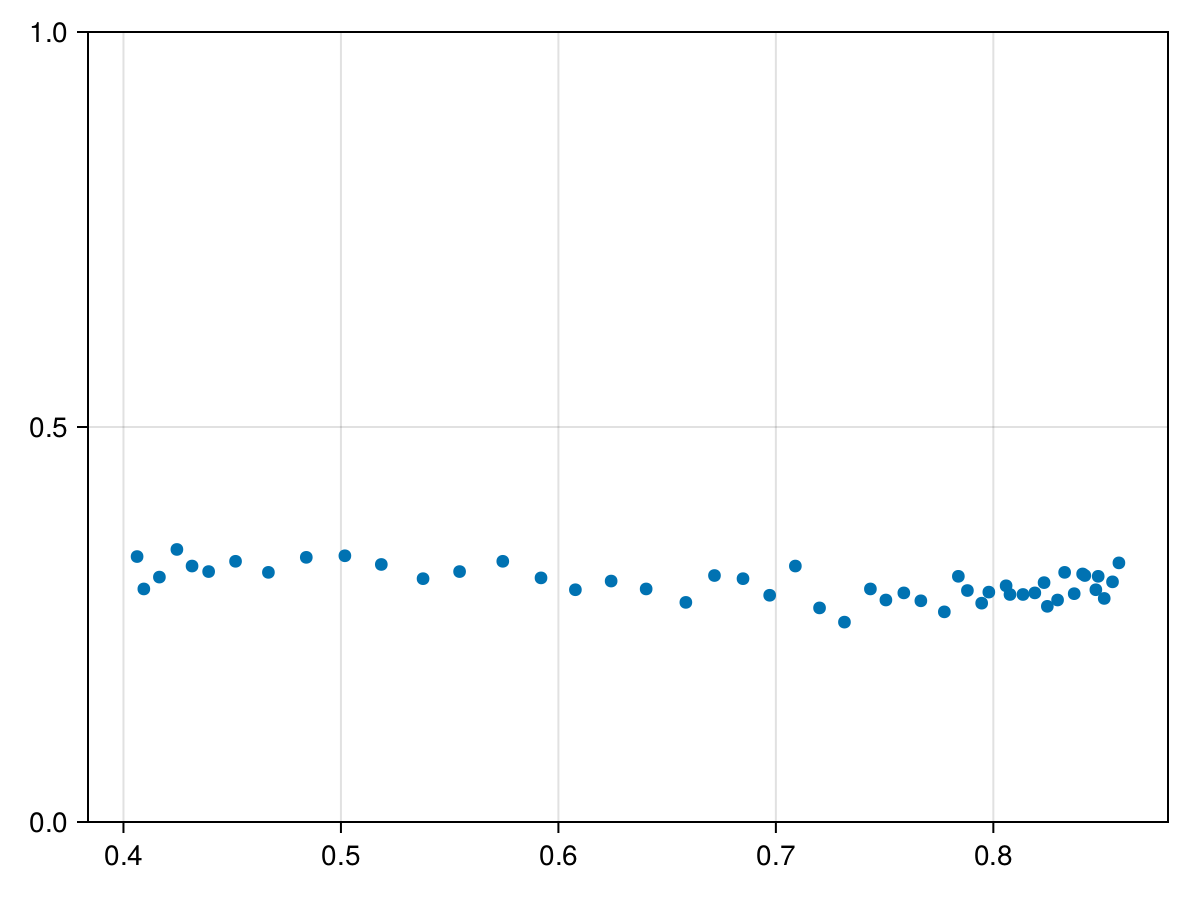

In [18]:
f,ax = plot(mean(res["p"], dims =2)[:,1][:], mean(stab,dims=2)[:,1][:])
ylims!(ax, 0,1)
f

In [19]:
cor(mean(res["p"], dims =2)[:,1][:], mean(stab,dims=2)[:,1][:])

-0.5505965316910058

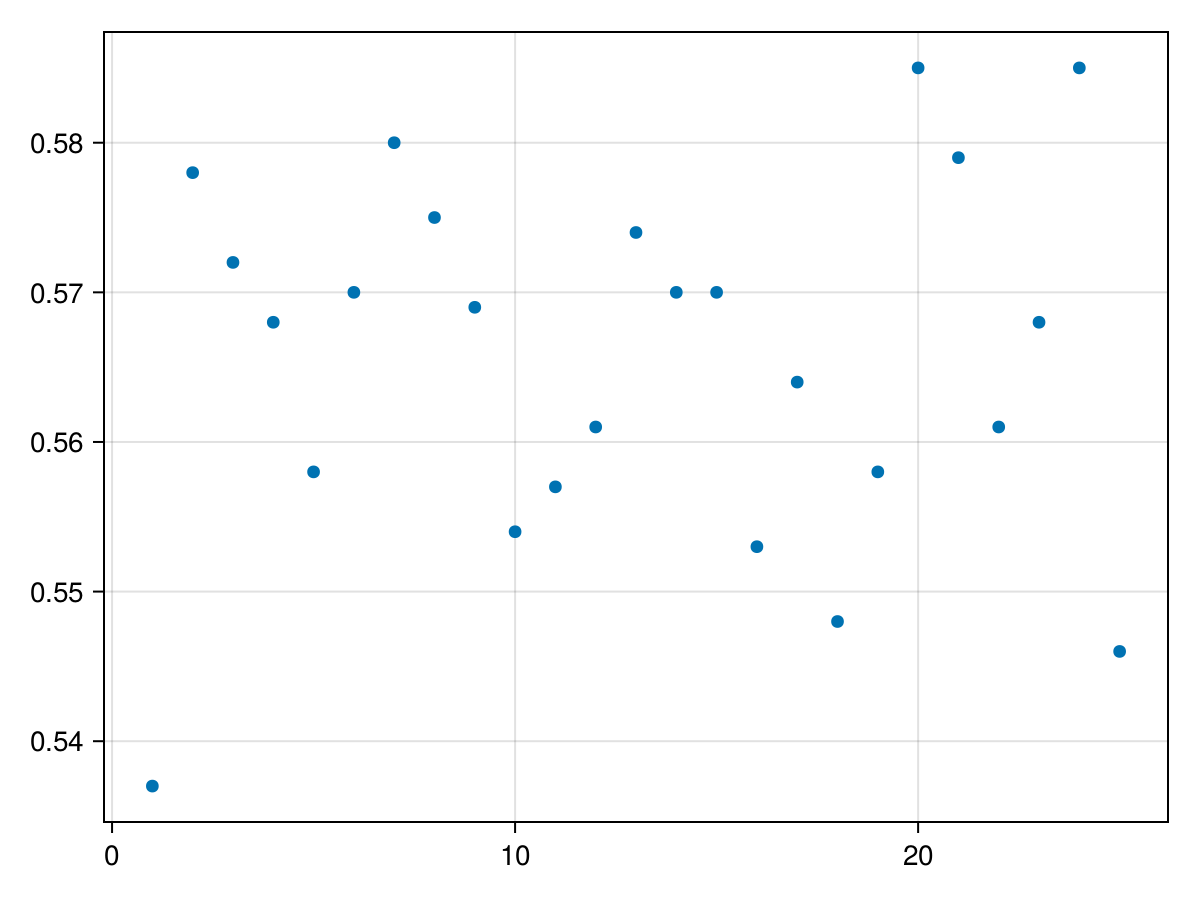

In [20]:
res = load("../Results/data/new_sims/modular_stabiltiy.jld2")

stab = [x.re < 0 for x = res["l"]]

plot(mean(stab,dims=2)[:,1])

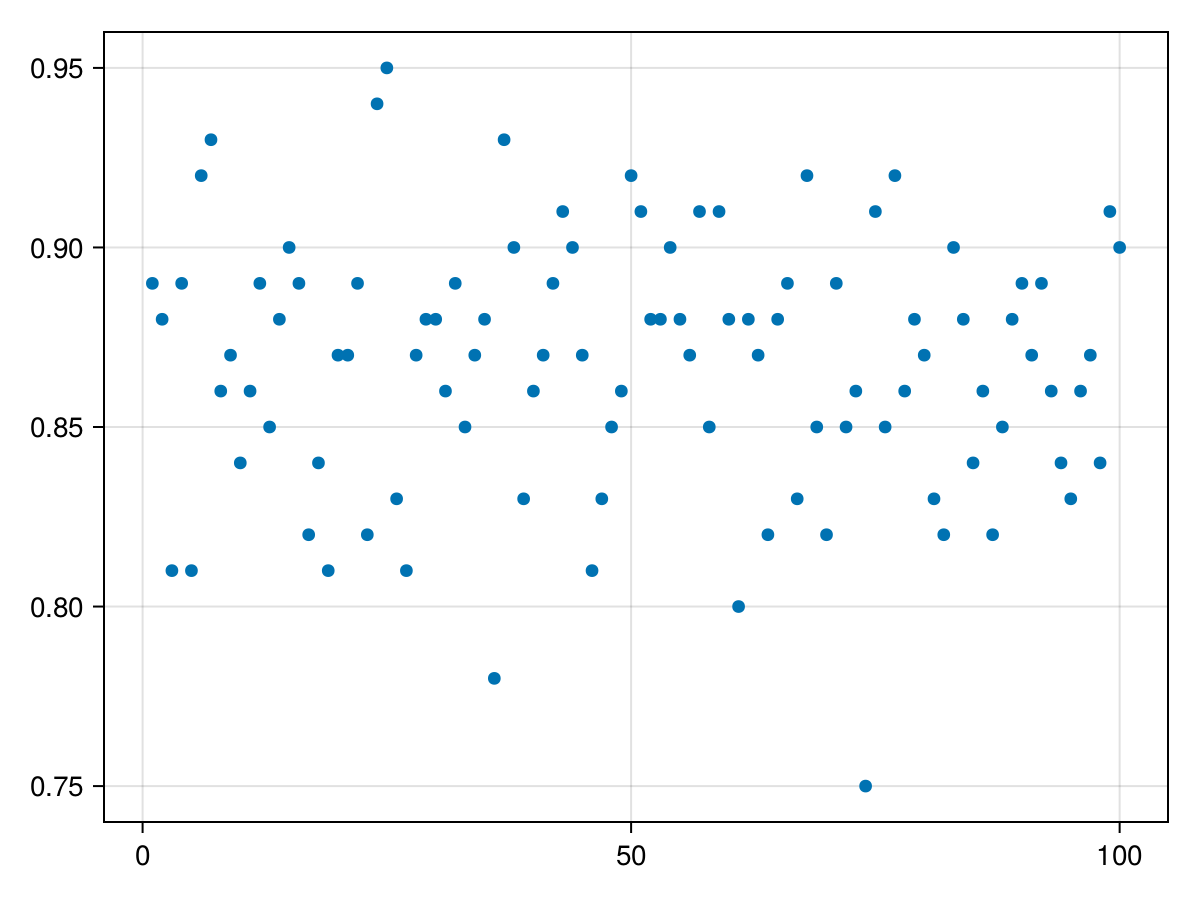

In [21]:
res = load("../Results/data/new_sims/coherence_stabiltiy.jld2")

stab = [x.re < 0 for x = res["l"]]

plot(mean(stab,dims=2)[:,1])

In [174]:
norm.(eigen(J).vectors) |> heatmap

LoadError: UndefVarError: `J` not defined

In [369]:
p.s.χ

1×10 Matrix{Float64}:
 0.2  0.2  0.2  0.2  0.0  0.0  0.0  0.0  0.0  0.2

In [212]:
J .= 0
    #loop over consumers
    for i = 1:p.N
        for j = 1:p.N
            #dxi/dxi
            if i == j
                J[i,i] = p.s.α[i] * (1 - p.s.Λ[i]) * (p.e.gx[i] - p.e.mx[i])
            end
        end
        
        for a = 1:p.M
            #dxi/dya
            J[i, a + p.N] = p.s.α[i] * ( 
                (1 - p.s.Λ[i]) * (
                (p.e.gs[i] * p.s.χ[i,a] * p.e.fy[i,a])
                ) +
                (p.s.Λ[i] * p.e.λy[i,a])
            )
        end

    end

In [219]:
p.s.χ .* p.e.fy



100×200 Matrix{Float64}:
 0.0        0.030303   0.0        …  0.0        0.0  0.0  0.030303
 0.0        0.0        0.0           0.0        0.0  0.0  0.0
 0.0344828  0.0        0.0           0.0        0.0  0.0  0.0
 0.0        0.0357143  0.0357143     0.0        0.0  0.0  0.0357143
 0.0        0.0        0.0344828     0.0        0.0  0.0  0.0
 0.0        0.0285714  0.0        …  0.0        0.0  0.0  0.0285714
 0.0        0.0        0.0           0.0        0.0  0.0  0.0
 0.0        0.0        0.0           0.0        0.0  0.0  0.030303
 0.0        0.0357143  0.0           0.0        0.0  0.0  0.0
 0.0555556  0.0555556  0.0           0.0        0.0  0.0  0.0
 0.0        0.0        0.0        …  0.0357143  0.0  0.0  0.0357143
 0.0        0.0333333  0.0           0.0333333  0.0  0.0  0.0
 0.0357143  0.0357143  0.0           0.0357143  0.0  0.0  0.0
 ⋮                                ⋱                       
 0.037037   0.037037   0.0           0.0        0.0  0.0  0.0
 0.0        0.04    

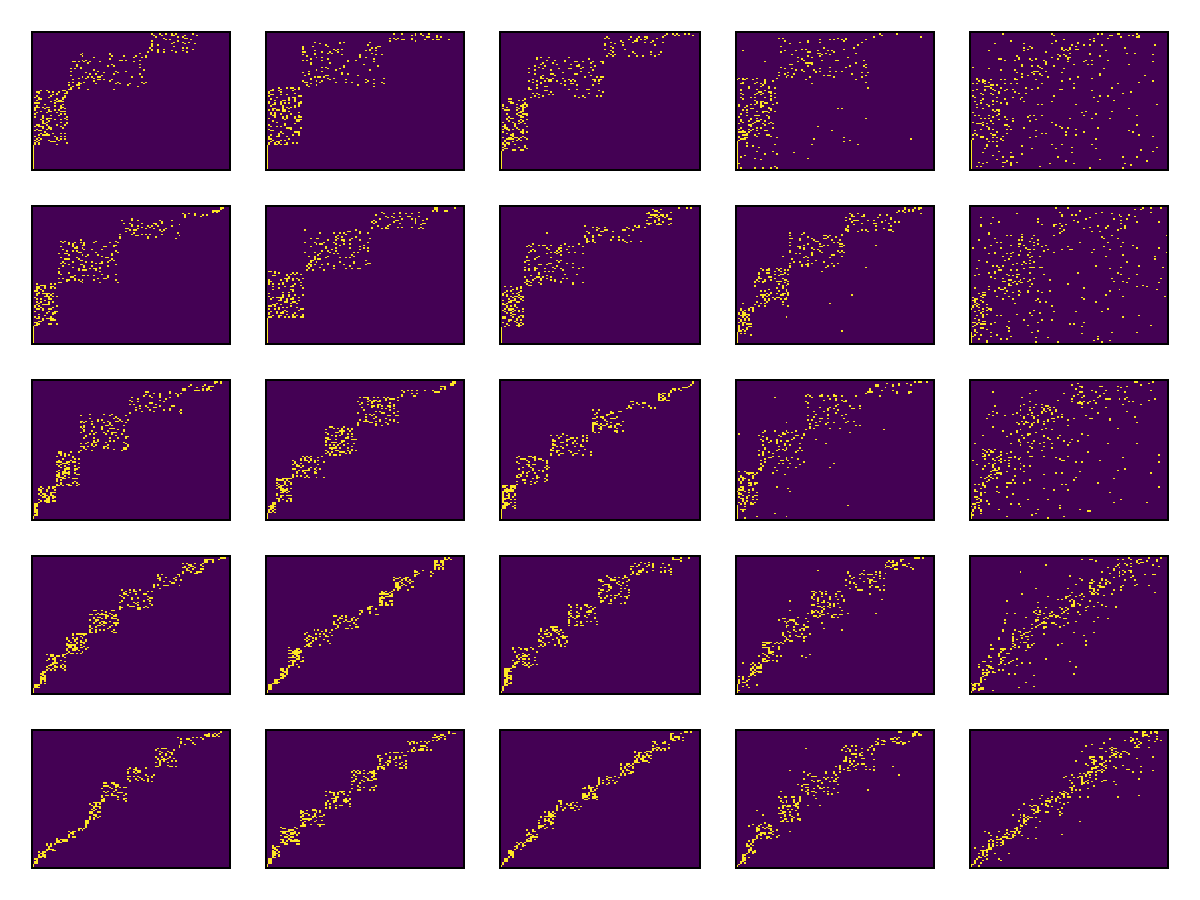

In [290]:
M = 100
λd = 3.0

h_vec = range(-2,2, length = 5)
T_vec = 10 .^ range(-2,0, length=5)

f = Figure()

for i = 1:5
    for j= 1:5
        ax = Axis(f[i,j])
        hidedecorations!(ax)
        heatmap!(ax, coherence_D(M,λd,h_vec[i],T_vec[j]))
    end
end
f

In [335]:
function get_switching_parameters(N,M,σ)

    gx = rand(Uniform(0.75,1.0)) .+ rand(Uniform(-σ,σ), N)
    gs = rand(Uniform(1,2)) .+ rand(Uniform(-σ,σ), N)
    gw = -rand(Uniform(1,2)) .+ rand(Uniform(-σ,σ), N)
    mx = rand(Uniform(1.0,1.25)) .+ rand(Uniform(-σ,σ), N)
    
    fy = rand(Uniform(σ,2)) .+ rand(Uniform(-σ,σ),N,M)
    hy = rand(Uniform(σ,2)) .+ rand(Uniform(-σ,σ),N,M)

    # fy = ones(N,M)
    # hy = ones(N,M)
    
    λy = rand(Uniform(-1,1)) .+ rand(Uniform(-σ,σ),N,M)
    # ωy = rand(Uniform(-1,1)) .+ rand(Uniform(-σ,σ),N,M)
    # λy = zeros(N,M)

    iy = rand(Uniform(σ,0.5)) .+ rand(Uniform(-σ,σ), M)
    oy = rand(Uniform(1.0,2.0)) .+ rand(Uniform(-σ,σ), M)

    return MiCRM_stability.exponential_params(gx,gs,gw,mx,fy,hy,λy,iy,oy)
end

function coherence_D(M,λd,h,T)
    #create skeleton
    TL = fill(-Inf,M)
    TL[1] = 1
    
    D = zeros(M,M)
    p = 0
    for i = 2:M
        ind = 1:(i-1)
    #choose base
        pb = (TL[ind] / maximum(TL[ind])) .^ h
        b = sample(ind, Weights(pb[ind]))
        D[b,i] = 1
        TL[i] = TL[b] + 1
    end
    
    #sort by TL
    TLind = sortperm(TL)
    D = D[TLind, TLind]
    TL = TL[TLind]
    
    #add extra links
    k = rand(Poisson(λd), M)
    x = TL .- TL'
    pl = exp.(-abs.(x .- 1)/ T)
    pl[findall(D .== 1)] .= 0
    pl[diagind(pl)] .= 0
    
    for i = 2:M
        D[sample(1:M, Weights(pl[i,:]), k[i]), i] .= 1
    end
    
    return(D)
end

function random_community(N,M,f,h,T)
    U = rand(N,M) ./ (N*M)
    U[:,end] .= 0
    
    D = coherence_D(M,3.0,h,T)
    [D[i,:] .= D[i,:] ./ sum(D[i,:]) for i = 1:M]
    D[isnan.(D)] .= 0.0
    
    Λ = fill(rand(),N)
    
    s = MiCRM_stability.get_structural_params(U,D,Λ)
    e = f(N,M, 0.1)
    u = MiCRM_stability.util_params(N,M,s,e)
    
    p = MiCRM_stability.Parameters(N,M,s,e,u)

    return(p)
end

random_community (generic function with 1 method)

In [334]:
N,M = 50,100
U = rand(N,M) ./ (N*M)
U[:,end] .= 0

D = coherence_D(M,3.0,h,T)
[D[i,:] .= D[i,:] ./ sum(D[i,:]) for i = 1:M]
D[isnan.(D)] .= 0.0

Λ = fill(rand(),N)

s = MiCRM_stability.get_structural_params(U,D,Λ)

s.ψ

50×100×100 Array{Float64, 3}:
[:, :, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0